##  Проектная работа по модулю “Математика и статистика в Python”

1.Загрузить файл hr.csv.

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6.Рассчитать сколько работников работает в каждом департаменте.

7.Показать распределение сотрудников по зарплатам.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

9.Сколько сотрудников покинули компанию.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## 1.   Загрузить файл hr.csv.

In [4]:
data = pd.read_csv('C:/Users/Игорь/Downloads/HR/HR.csv')
data.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Мода

In [7]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## 3 Рассчитать и визуализировать корреляционную матрицу для переменных.

Перед расчетом корреляционной матрицы преобразуем датафрейм, преобразовав колонки со строковыми значениями в соответствующие колонки с цифровым кодом для профессий (департаментов) от 0 до 9 и для уровня зарплаты (low, middle,high) как 0,1,2

In [8]:
professions = pd.unique(data['sales']).tolist()

In [9]:
professions = pd.unique(data['sales']).tolist()
def prof_maker(row):
    if row == 'sales':
            return 0
    elif row == 'accounting':
            return 1
    elif row == 'hr':
            return 2
    elif row == 'technical':
            return 3
    elif row == 'support':
            return 4
    elif row == 'management':
            return 5
    elif row == 'IT':
            return 6
    elif row == 'product_mng':
            return 7
    elif row == 'marketing':
            return 8
    return 9
data['Professions'] = data['sales'].apply(prof_maker)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Professions
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [10]:
pd.unique(data['salary']).tolist()

['low', 'medium', 'high']

In [11]:
def salary_maker(row):
    if row == 'low':
            return 0
    elif row == 'medium':
            return 1
    return 2
data['Salary_code'] = data['salary'].apply(salary_maker)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Professions,Salary_code
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0


In [12]:
data_all = data
data = data.drop(['sales','salary'], axis=1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Professions,Salary_code
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


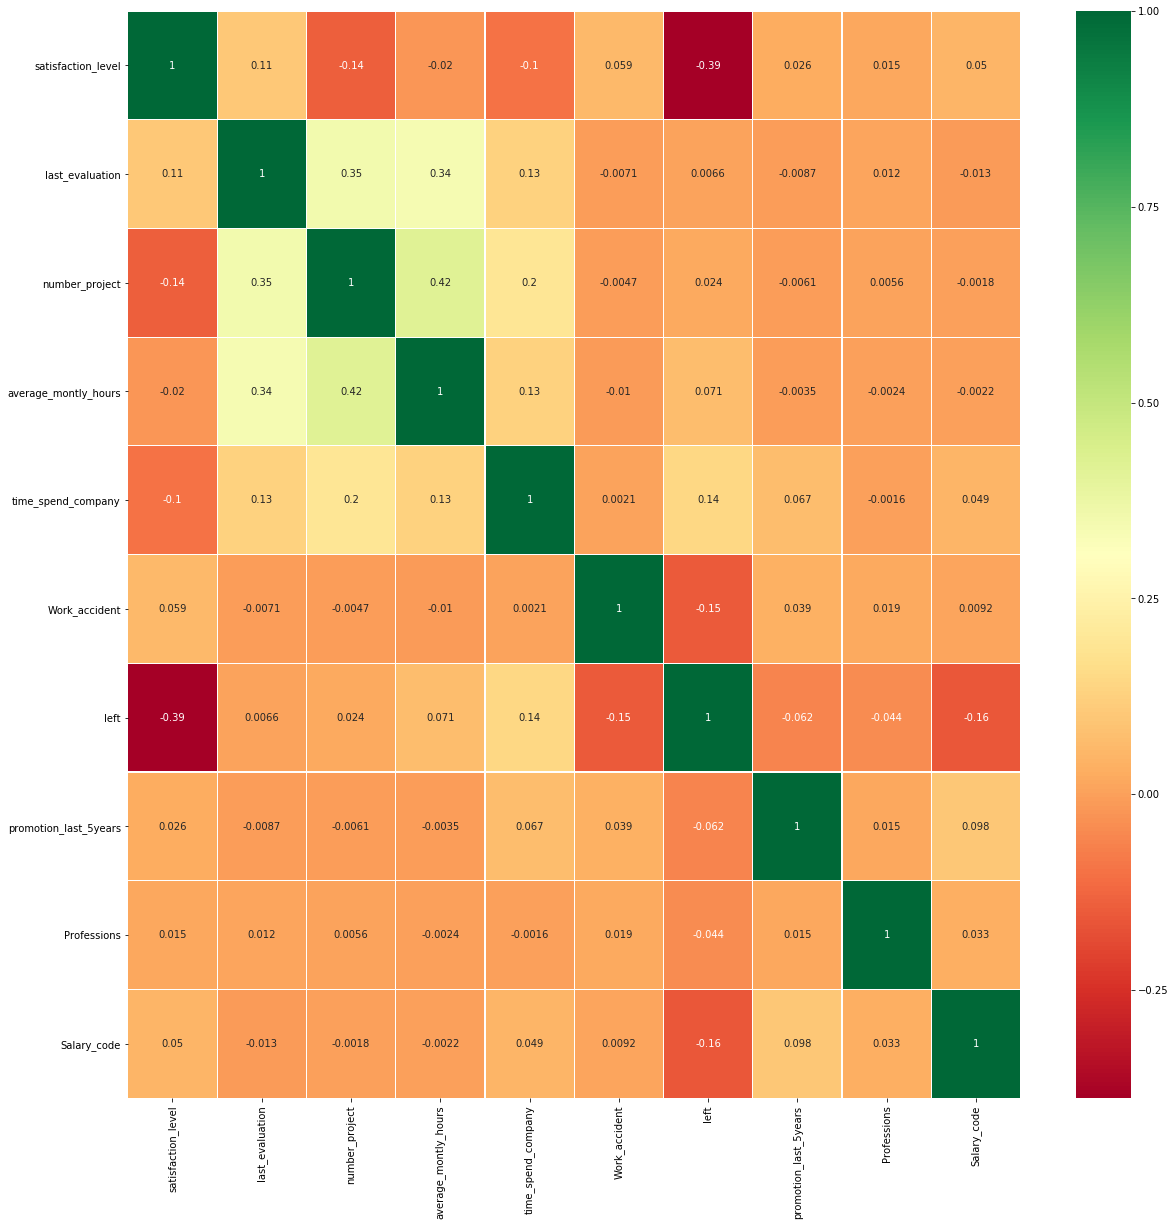

In [17]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

## 4.    Визуализировать несколько взаимосвязей между переменными.

Text(0.5, 1.0, 'Диаграмма рассеивания среднемесячной наработки от уровня удовлетворенности разделенная по признаку left')

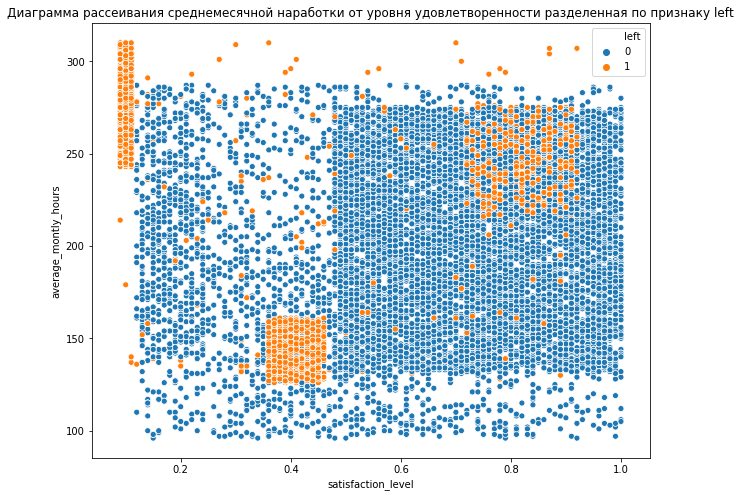

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,8
sns.scatterplot(x="satisfaction_level", y="average_montly_hours", hue="left", data=data)
plt.title("Диаграмма рассеивания среднемесячной наработки от уровня удовлетворенности разделенная по признаку left")

## Хорошо выделяются три группы уволившихся сотрудников, что дает информацию для анализа причин увольнения 

Text(0.5, 1.0, 'Диаграмма рассеивания  оценки сотрудника от среднемесячной наработки, разделенная по признаку left ')

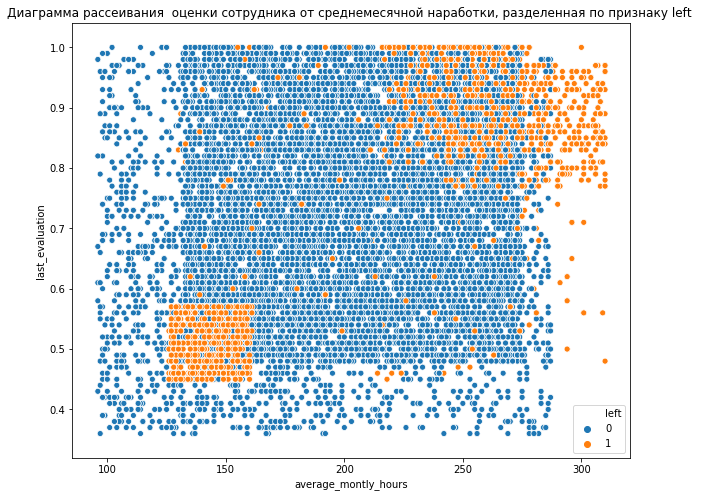

In [19]:
sns.scatterplot(x="average_montly_hours", y="last_evaluation", hue="left", data=data)
plt.title("Диаграмма рассеивания  оценки сотрудника от среднемесячной наработки, разделенная по признаку left ")

## Здесь видны 2 четкие группы уволившихся

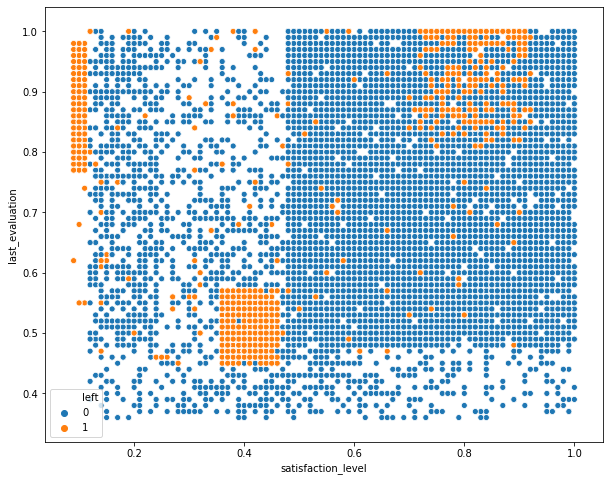

In [20]:
sns.scatterplot(x="satisfaction_level", y="last_evaluation", hue="left", data=data)

## видны три группировки уволившихся

## 5.   С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [21]:
from scipy import stats


## проверим величины выборок по признаку "left", для того чтобы проверить утверждение: средняя наработка за месяц у работающих и покинувших компанию различны.

In [22]:
len(data[data['left']==1]['average_montly_hours'])

3571

In [23]:
len(data[data['left']==0]['average_montly_hours'])

11428

## p-value меньше уровня значимости (0.05), отвергаем нулевую гипотезу, выборки имеют разные средние т.е ежемесячная наработка работающих сотрудников и ушедших различны:

In [24]:
stats.ttest_ind(data[data['left']==1]['average_montly_hours'].sample(n=3000),
                data[data['left']==0]['average_montly_hours'].sample(n=3000))

Ttest_indResult(statistic=5.934692066508878, pvalue=3.108552006120822e-09)

## Проверим различны ли последние оценки для работающих и покинувших компанию

In [25]:
stats.ttest_ind(data[data['left']==1]['last_evaluation'].sample(n=3000),
                data[data['left']==0]['last_evaluation'].sample(n=3000))

Ttest_indResult(statistic=0.21746635792021876, pvalue=0.8278523191144936)

## p-value значительно больше уровня значимости (0.05), принимаем нулевую гипотезу, last_evaluation для работающих сотрудников и ушедших статистически связаны, а значит оценки ушедших и оставшихся примерно равны.

## 6.   Рассчитать сколько работников работает в каждом департаменте.

Для начала отфильтруем выборку по признаку 'left', то есть оставим только работающих в настоящее время сотрудников:

In [26]:
working_now = data_all[data_all['left'] == 0]
working_now.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Professions,Salary_code
2000,0.58,0.74,4,215,3,0,0,0,sales,low,0,0
2001,0.82,0.67,2,202,3,0,0,0,sales,low,0,0
2002,0.45,0.69,5,193,3,0,0,0,sales,low,0,0
2003,0.78,0.82,5,247,3,0,0,0,sales,low,0,0
2004,0.49,0.60,3,214,2,0,0,0,sales,low,0,0


In [27]:

prof_count = working_now.groupby('sales').count().sort_values('left',ascending = False)
prof_count.reset_index()
X = prof_count.index
Y = prof_count.left
for i in X:
    print(f' количество работников в департаменте {i}   {prof_count.left[i]}')

 количество работников в департаменте sales   3126
 количество работников в департаменте technical   2023
 количество работников в департаменте support   1674
 количество работников в департаменте IT   954
 количество работников в департаменте product_mng   704
 количество работников в департаменте RandD   666
 количество работников в департаменте marketing   655
 количество работников в департаменте accounting   563
 количество работников в департаменте management   539
 количество работников в департаменте hr   524


Text(0.5, 1.0, 'Количество работников по департаментам')

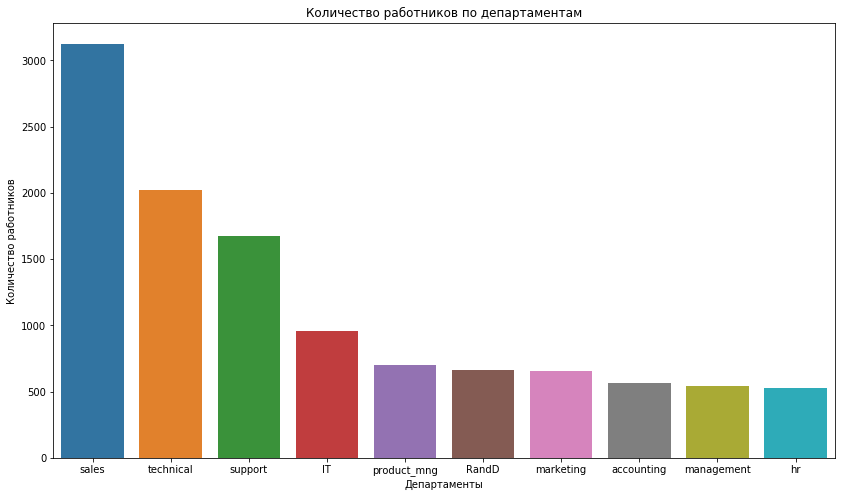

In [28]:
f, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=X, y=Y)
plt.xlabel('Департаменты')
plt.ylabel('Количество работников')
plt.title('Количество работников по департаментам')

## 7. Распределение сотрудников по зарплатам


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

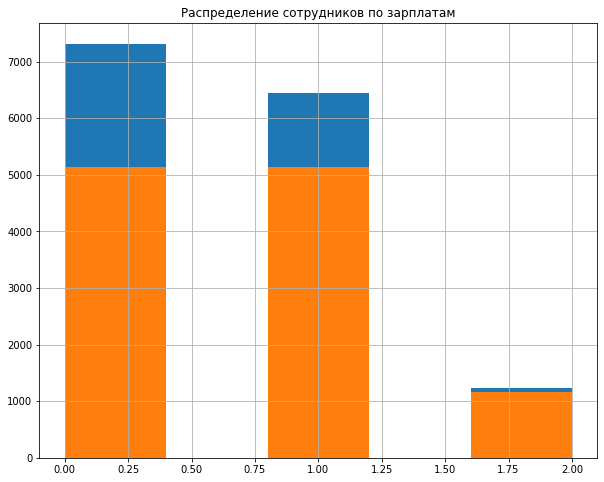

In [29]:
data['Salary_code'].hist(bins=5)
working_now['Salary_code'].hist(bins=5)
plt.title("Распределение сотрудников по зарплатам")

## Как видно из представленной выше гистограммы относительное количество уволившихся минимально для группы сотрудников с высокой зарплатой 

## 8. Распределение сотрудников по зарплатам по департаментам

Построим распределения из выборки работающих в настоящее время сотрудников

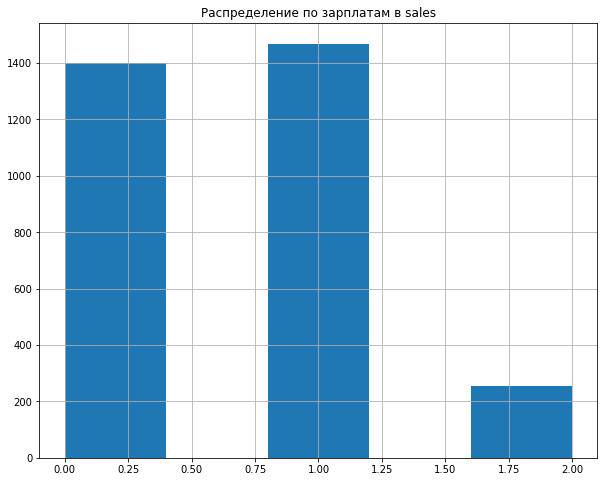

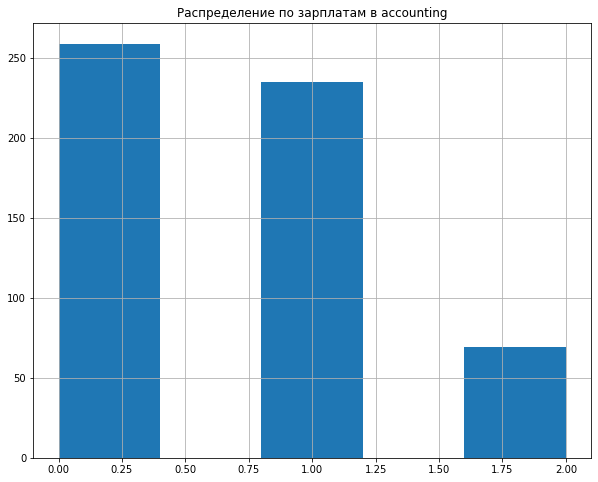

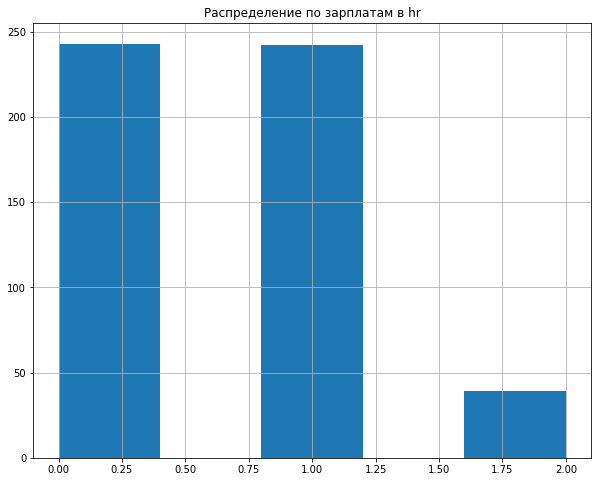

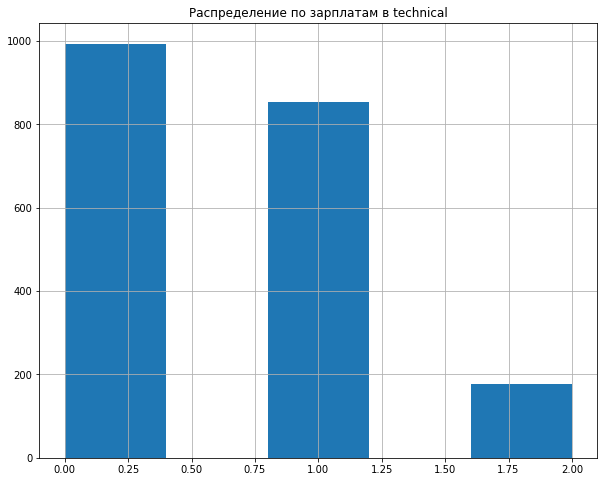

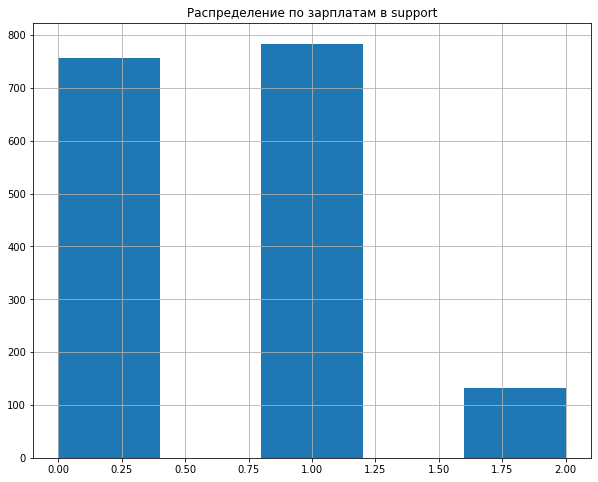

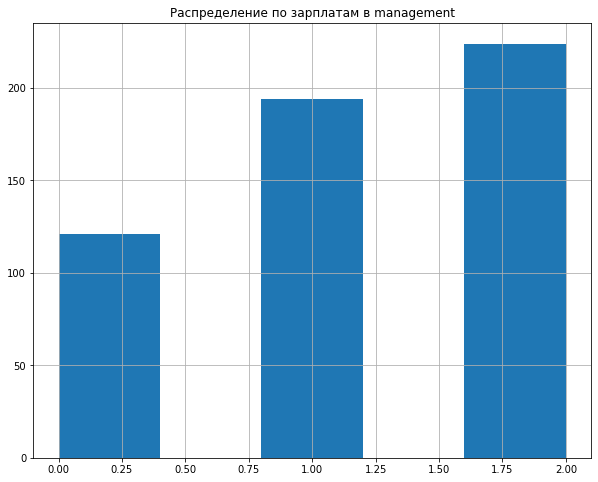

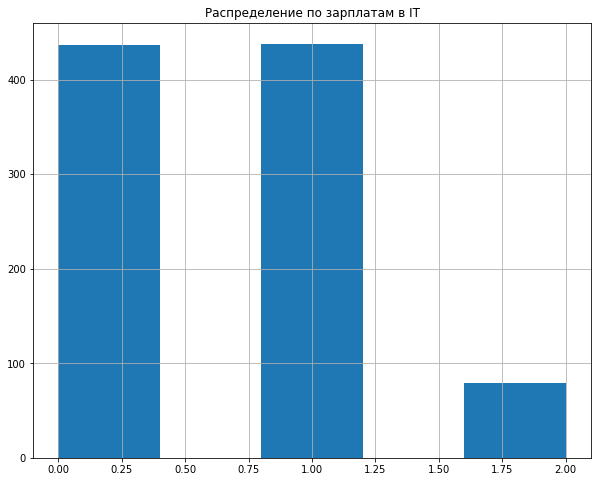

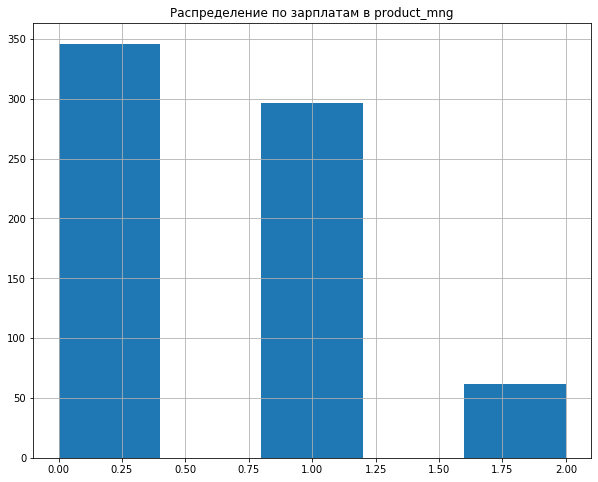

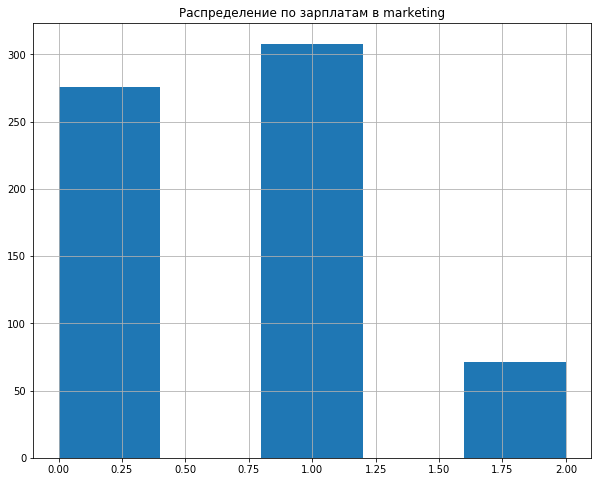

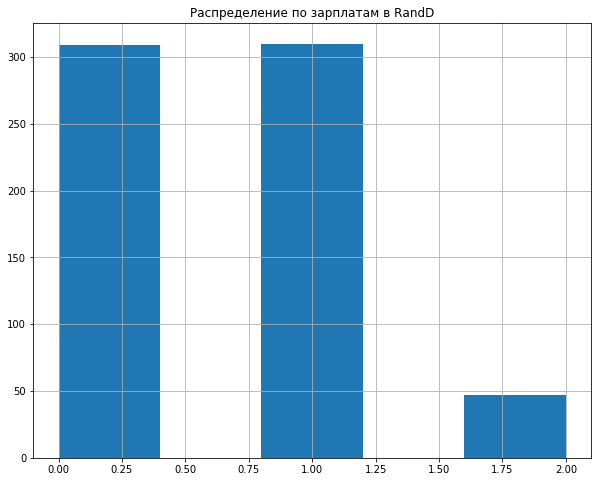

In [30]:
for departament in professions:
    working_now[working_now['sales']==departament]['Salary_code'].hist(bins=5)
    plt.title(f'Распределение по зарплатам в {departament}')
    plt.show()

## И общий график:

Text(0.5, 1.0, 'Распределение зарплат по департаментам')

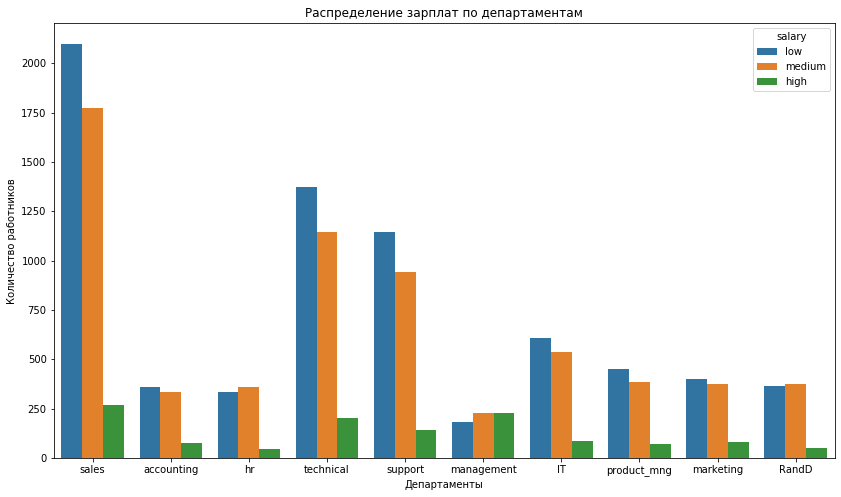

In [84]:
f, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='sales',hue = 'salary', data=data_all)
plt.xlabel('Департаменты')
plt.ylabel('Количество работников')
plt.title('Распределение зарплат по департаментам')

## Как видно из представленных гистограмм распределение зарплат по департаментам примерно одинаковое (количество работников с низкой и средней зарплатой приблизительно равно, таких работников подавляющее большинство). Исключение составляет менеджмент - большинство в департаменте получает высокую зарплату.

## 9.   Сколько сотрудников покинули компанию

In [31]:
len(data_all[data_all['left']==1])

3571

## 10.   Почему сотрудники покидают компанию ?

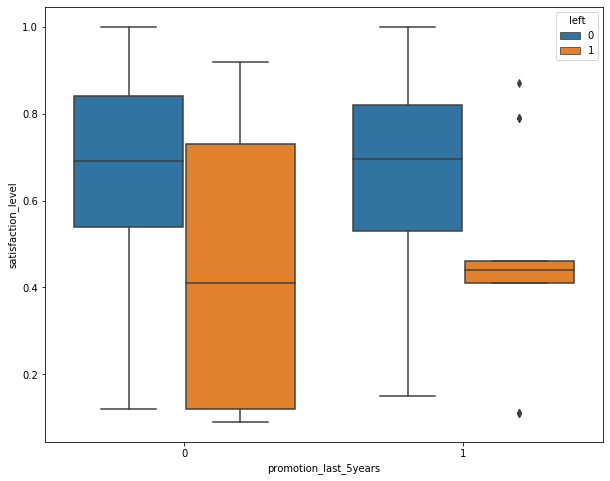

In [32]:
sns.boxplot(x="promotion_last_5years", y="satisfaction_level",hue='left',
            data=data)

## Гипотеза № 1. 

По приведенной выше диаграмме видно, что компанию покидают сотрудники с относительно высоким удовлетворением работой, но не получавшие продвижения по службе за последние 5 лет, сотрудники получившие продвижение покидают компанию только при относительно низком уровне удовлетворенности работой (около 0.4)

##  Гипотеза № 2

На диаграмме рассеивания оценки сотрудника от среднемесячной наработки, разделенная по признаку left выделяется квадратная область, изучим ее подробнее, чтобы понять почему эти сотрудники покидают компанию:

Text(0.5, 1.0, 'Диаграмма рассеивания  оценки сотрудника от последней оценки, разделенная по признаку left ')

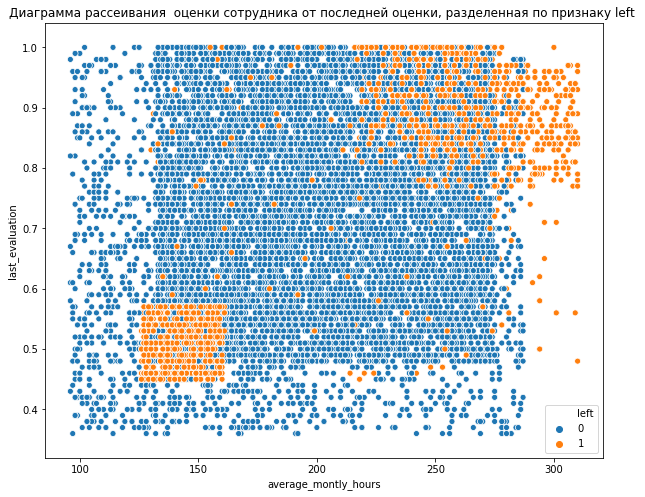

In [33]:
sns.scatterplot(x="average_montly_hours", y="last_evaluation", hue="left", data=data)
plt.title("Диаграмма рассеивания  оценки сотрудника от последней оценки, разделенная по признаку left ")

## поместим эту выборку в отдельный набор данных

In [34]:
students = data[(data['average_montly_hours'] > 125) & (data['average_montly_hours'] < 162)
                & (data['last_evaluation'] >= 0.45) & (data['last_evaluation'] < 0.575) ]

Text(0.5, 1.0, 'Диаграмма рассеивания  оценки сотрудника от среднемесячной наработки, разделенная по признаку left ')

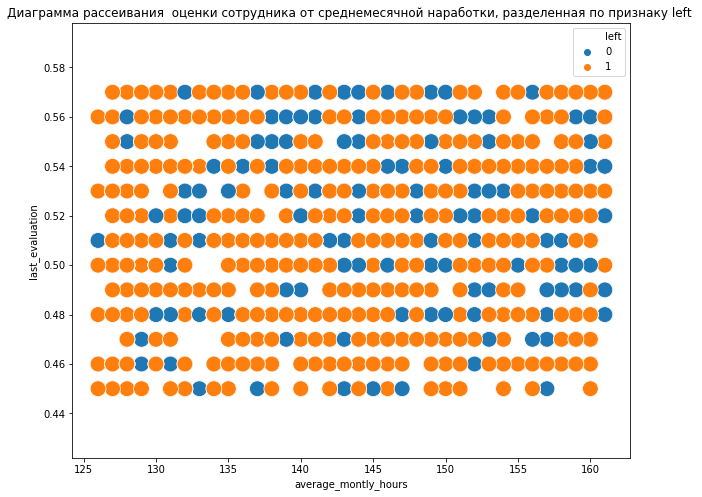

In [35]:
sns.scatterplot(x="average_montly_hours", y="last_evaluation", hue="left", data=students,s =250)
plt.title("Диаграмма рассеивания  оценки сотрудника от среднемесячной наработки, разделенная по признаку left ")

## общий размер выборки

In [36]:
len(students)

1994

## количество покинувших компанию

In [37]:
len(students[students['left'] == 1])

1532

## Размер этой выборки 1994 человека, из них 75 %  процентов покинули компанию

## Рассмотрим распределение покинувших компанию по количеству отработанного времени в годах

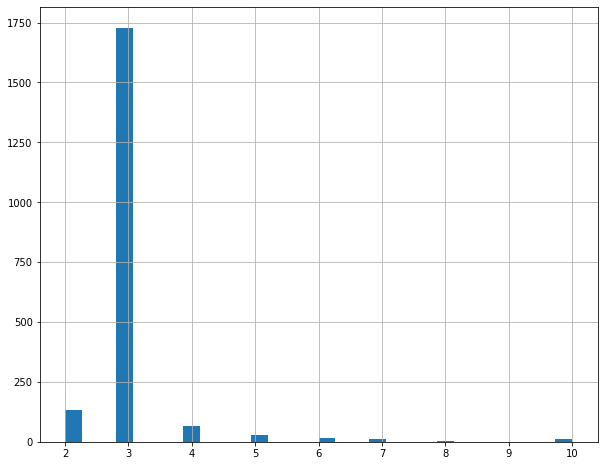

In [38]:
students['time_spend_company'].hist(bins=30)

In [39]:
len(students[(students['time_spend_company'] == 3) & students['left'] == 1])

1515

## Почти все (1515) в этой группе покинули компанию в третий год пребывания. Учитывая четкие границы оценивания этой группы [0.45; 0.75], а также одинаковый разброс уровня удовлетворенности (примерно 0.4) и четкие границы среднемесячной наработки можно предположить, что эта группа является стажерами на предприятии или особой группой сменного персонала, работающего по трехлетнему контракту. 

## Гипотеза № 3 компанию покидают профессионалы с высокой загруженностью (среднемесячной наработкой), это видно из диаграммы рассеивания  оценки сотрудника от последней оценки, разделенная по признаку left (см. выше), также компанию покинули все,

In [40]:
len(data[(data['number_project'] == 7) & (data['left'] == 1)])

256

## 256 сотрудников, имеющих количество проектов 7 (то же - высокая загруженность)

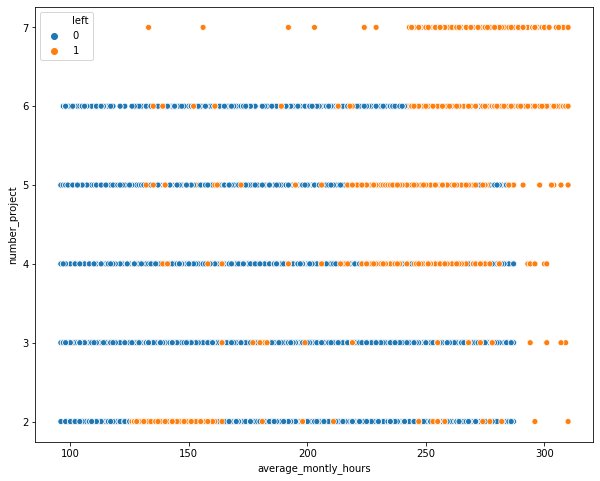

In [41]:
sns.scatterplot(x="average_montly_hours", y="number_project", hue="left", data=data)

## По представленной ниже гистограмме среднемесячной наработки для уволенных видно, что

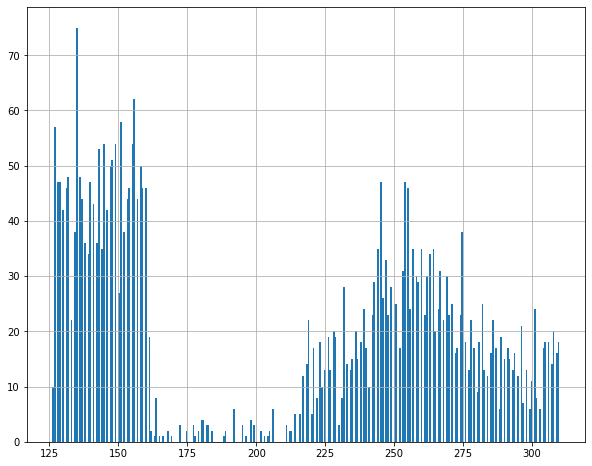

In [42]:
data[data['left'] == 1]['average_montly_hours'].hist(bins=300)

## пик увольнений приходится на долю сотрудников с ежедневной наработкой более 11 часов (при 5-дневной рабочей неделе)
Здесь были отброшены значения в интервале 125-160, как рассмотренные ранее в гипотезе № 2

## Гипотеза 4.
Большое количество проектов повышает среднемесячную наработку и снижает уровень удовлетворенности работой, вследствие этих факторов сотрудник покидает компанию.

## выделим выборку сотрудников с низкой удовлетворенностью из общего набора данных

In [43]:
low_satisfaction = data_all[(data_all['satisfaction_level'] < 0.15) & (data_all['left'] == 1)]

In [44]:
left_data = data_all[data_all['left'] == 1]

Text(0.5, 1.0, 'Распределение частоты увольнений в зависимости от количества проектов в выборке с низкой удовлетворенностью работой')

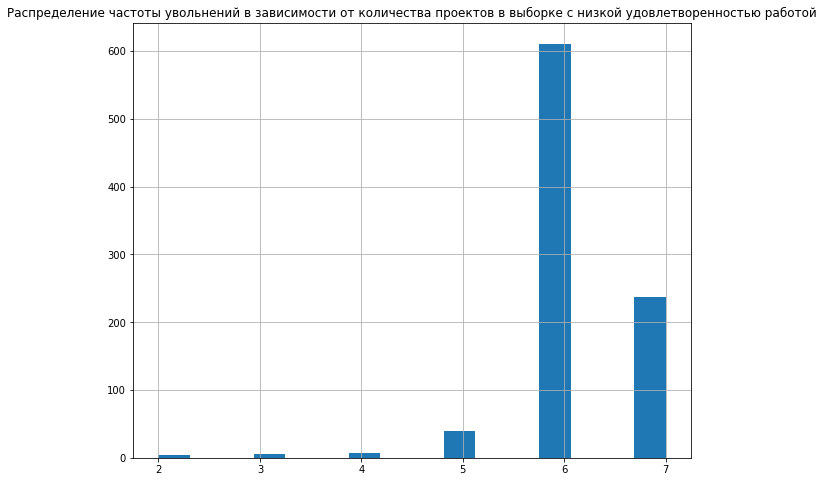

In [45]:
low_satisfaction['number_project'].hist(bins = 16)
plt.title('Распределение частоты увольнений в зависимости от количества проектов в выборке с низкой удовлетворенностью работой')

## как видно, абсолютный максимум увольнений в этой выборке приходится на долю сотрудников с 6-ю проектами,
посмотрим на распределение относительной частоты увольнений и среднемесяной наработки от количества проектов, для этого построим "bubble chart", где доля  уволенных сотрудников с 7 проектами будет составлять 100 процентов. 

In [46]:
area = []
x = []
projects = sorted(pd.unique(left_data['number_project']))
for project in projects:
    x.append(left_data[left_data['number_project'] == project]['average_montly_hours'].mean())
    area.append(2000 * len(left_data[left_data['number_project'] == project]) / 
                len(data_all[data_all['number_project'] == project]) )
    

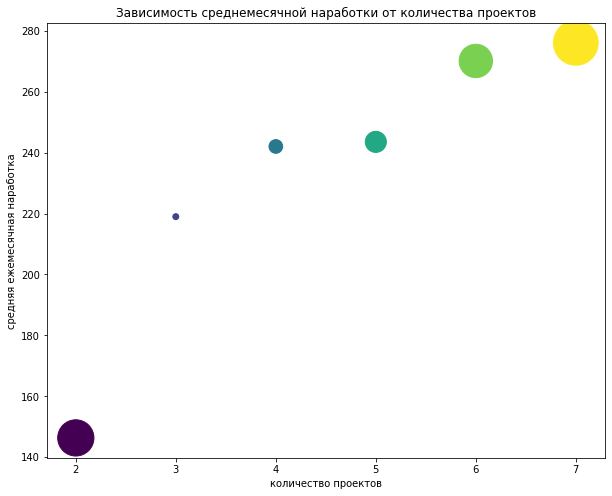

In [47]:
plt.scatter(projects,x,s=area, c=projects)
plt.ylabel('средняя ежемесячная наработка')
plt.xlabel('количество проектов')
plt.title('Зависимость среднемесячной наработки от количества проектов')
plt.show()

## как видно из графика и среднемесячная наработка и относительное количество увольнений (размер "пузыря") возрастают при увеличении количества проектов вплоть до 100 % для 7 проектов.

In [48]:
low = low_satisfaction.groupby('sales').sum().sort_values('left',ascending = False)
low

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Professions,Salary_code
sales,,,,,,,,,,
sales,23.74,201.70,1432,64061,949,11,232,0,0,92
technical,20.56,175.40,1247,55880,826,11,202,3,606,78
support,13.74,118.02,818,36427,541,12,134,0,536,38
IT,9.01,76.94,537,24346,366,3,88,0,528,38
accounting,5.69,45.82,340,15571,222,1,55,0,55,30
hr,4.98,41.45,304,13243,204,0,49,0,98,35
marketing,4.03,35.19,254,11282,165,0,40,0,320,12
product_mng,4.00,34.04,253,11195,161,0,40,0,280,19
RandD,3.86,31.68,214,9728,151,7,37,0,333,27


In [49]:
for_all = data_all.groupby('sales').count().sort_values('left',ascending = False)

Y_low = 100 * low['left'] / for_all['left']
X_low = Y_low.index
Y_low

sales
IT             7.171964
RandD          4.701398
accounting     7.170795
hr             6.630582
management     4.444444
marketing      4.662005
product_mng    4.434590
sales          5.603865
support        6.011664
technical      7.426471
Name: left, dtype: float64

Text(0.5, 1.0, 'Распределение по департаментам сотрудников с низкой удовлетворенностью работой')

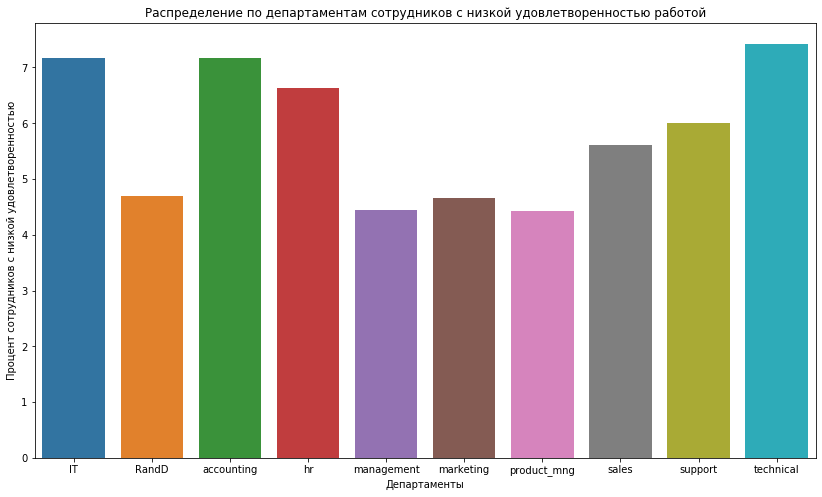

In [50]:
f, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=X_low, y=Y_low)
plt.xlabel('Департаменты')
plt.ylabel('Процент сотрудников с низкой удовлетворенностью')
plt.title('Распределение по департаментам сотрудников с низкой удовлетворенностью работой')

## Наибольший процент сотрудников с низкой удовлетворенностью работой в "technical" ,"IT" и "accounting"

In [69]:
salary_low_all = data_all[data_all['salary'] == 'low']
salary_low = salary_low_all.groupby('sales').count().sort_values('left',ascending = False)
salary_low.reset_index()
X_low = salary_low.index
Y_low = salary_low.left

salary_medium_all = data_all[data_all['salary'] == 'medium']
salary_medium = salary_medium_all.groupby('sales').count().sort_values('left',ascending = False)
salary_medium.reset_index()
X_medium = salary_medium.index
Y_medium = salary_medium.left

salary_high_all = data_all[data_all['salary'] == 'high']
salary_high = salary_high_all.groupby('sales').count().sort_values('left',ascending = False)
salary_high.reset_index()
X_high = salary_high.index
Y_high = salary_high.left

Text(0.5, 1.0, 'Распределение зарплат по департаментам')

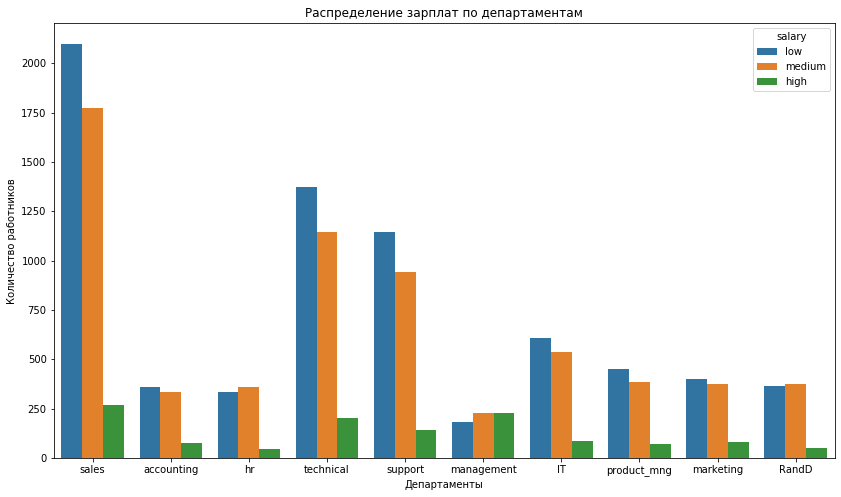

In [83]:
f, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='sales',hue = 'salary', data=data_all)
plt.xlabel('Департаменты')
plt.ylabel('Количество работников')
plt.title('Распределение зарплат по департаментам')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Professions,Salary_code
